# importing


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig
!pip install geopandas 
import geopandas
!pip install contextily
import contextily as ctx
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 9.4 MB/s 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0  1536k      0 --:--:-- --:--:-- --:--:-- 1536k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking

In [5]:
redditi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Redditi_e_principali_variabili_IRPEF_su_base_comunale_CSV_2020.csv',sep=';',index_col=False)
comuni = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Com01012021_g/Com01012021_g_WGS84.dbf')
provincie = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/ProvCM01012021_g/ProvCM01012021_g_WGS84.dbf')
regioni = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Reg01012021_g/Reg01012021_g_WGS84.dbf')

# dataframe

In [6]:

redditi

,Anno di imposta,Codice catastale,Codice Istat Comune,Denominazione Comune,Sigla Provincia,Regione,Codice Istat Regione,Numero contribuenti,Reddito da fabbricati - Frequenza,Reddito da fabbricati - Ammontare in euro,...,Reddito complessivo da 15000 a 26000 euro - Ammontare in euro,Reddito complessivo da 26000 a 55000 euro - Frequenza,Reddito complessivo da 26000 a 55000 euro - Ammontare in euro,Reddito complessivo da 55000 a 75000 euro - Frequenza,Reddito complessivo da 55000 a 75000 euro - Ammontare in euro,Reddito complessivo da 75000 a 120000 euro - Frequenza,Reddito complessivo da 75000 a 120000 euro - Ammontare in euro,Reddito complessivo oltre 120000 euro - Frequenza,Reddito complessivo oltre 120000 euro - Ammontare in euro,
0,2020,A001,28001,ABANO TERME,PD,Veneto,5,14831,7564,9593119,...,92436441,3268.0,114839495.0,413.0,26106754.0,400.0,37267762.0,177.0,35077122.0,NaN
1,2020,A004,98001,ABBADIA CERRETO,LO,Lombardia,3,208,89,78204,...,1479857,41.0,1302555.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020,A005,97001,ABBADIA LARIANA,LC,Lombardia,3,2451,1205,1802637,...,16331433,656.0,22609959.0,78.0,4903386.0,48.0,4323860.0,31.0,5299024.0,NaN
3,2020,A006,52001,ABBADIA SAN SALVATORE,SI,Toscana,9,4855,2667,2731533,...,36058075,754.0,25651776.0,69.0,4391549.0,33.0,3001230.0,13.0,2879460.0,NaN
4,2020,A007,95001,ABBASANTA,OR,Sardegna,20,1728,885,739857,...,8893696,430.0,14325272.0,26.0,1655926.0,13.0,1172342.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7899,2020,M428,75098,PRESICCE-ACQUARICA,LE,Puglia,16,6251,2376,2132368,...,20405915,580.0,19690477.0,31.0,1911397.0,25.0,2212573.0,15.0,3447739.0,NaN
7900,2020,M429,22252,BORGO D'ANAUNIA,TN,Trentino Alto Adige(P.A.Trento),4,2050,803,1304716,...,11623910,498.0,17366505.0,35.0,2265069.0,21.0,1848437.0,8.0,1959769.0,NaN
7901,2020,M430,22253,NOVELLA,TN,Trentino Alto Adige(P.A.Trento),4,3579,1210,1659890,...,18647708,667.0,22868038.0,40.0,2490656.0,31.0,2852464.0,10.0,1876163.0,NaN
7902,2020,M431,22254,VILLE DI FIEMME,TN,Trentino Alto Adige(P.A.Trento),4,2102,896,1015747,...,13983907,497.0,17515916.0,47.0,2946010.0,21.0,2064994.0,20.0,3869894.0,NaN


In [7]:
comuni

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,1001,001001,AgliÃ¨,None,0,16097.848297,1.330696e+07,"POLYGON ((404703.558 5026682.655, 405359.554 5..."
1,1,1,1,201,201,1002,001002,Airasca,None,0,16684.218599,1.595353e+07,"POLYGON ((380700.909 4977305.520, 381105.998 4..."
2,1,1,1,201,201,1003,001003,Ala di Stura,None,0,29892.674582,4.575189e+07,"POLYGON ((364710.857 5022090.678, 364737.794 5..."
3,1,1,1,201,201,1004,001004,Albiano d'Ivrea,None,0,16192.656480,1.103356e+07,"POLYGON ((415942.504 5033304.609, 416079.315 5..."
4,1,1,1,201,201,1006,001006,Almese,None,0,16077.245089,1.771710e+07,"POLYGON ((376934.962 4999073.854, 376960.555 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,5,20,111,0,111,111103,111103,Villaputzu,None,0,100515.537851,1.807260e+08,"MULTIPOLYGON (((556602.772 4375162.650, 556598..."
7899,5,20,111,0,111,111104,111104,Villasalto,None,0,58635.095264,1.303933e+08,"POLYGON ((541186.146 4375105.653, 541180.146 4..."
7900,5,20,111,0,111,111105,111105,Villasimius,None,0,49735.818257,5.759282e+07,"MULTIPOLYGON (((546451.098 4325900.553, 546443..."
7901,5,20,111,0,111,111106,111106,Villasor,None,0,53375.684321,8.640693e+07,"POLYGON ((500362.475 4361229.767, 500397.474 4..."


In [67]:
provincie.sort_values(by='DEN_UTS' )

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
83,5,19,84,0,84,Agrigento,-,Agrigento,AG,Libero consorzio di comuni,461223.891527,3.054102e+09,"MULTIPOLYGON (((822886.611 3935355.889, 822871..."
5,1,1,6,0,6,Alessandria,-,Alessandria,AL,Provincia,474884.593778,3.560310e+09,"POLYGON ((453307.918 5005504.323, 454248.380 5..."
41,3,11,42,0,42,Ancona,-,Ancona,AN,Provincia,272834.656008,1.961932e+09,"POLYGON ((839227.174 4849956.872, 839931.918 4..."
6,1,2,7,0,7,Aosta,-,Aosta,AO,Provincia,310968.058205,3.258838e+09,"POLYGON ((390652.644 5091766.171, 390748.643 5..."
50,3,9,51,0,51,Arezzo,-,Arezzo,AR,Provincia,377947.087958,3.233269e+09,"MULTIPOLYGON (((759716.788 4832917.570, 759731..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,418078.067821,2.082097e+09,"POLYGON ((438328.612 5087208.215, 439028.888 5..."
22,2,5,23,0,23,Verona,-,Verona,VR,Provincia,338171.850863,3.096209e+09,"POLYGON ((646461.323 5070531.489, 646402.575 5..."
101,4,18,102,0,102,Vibo Valentia,-,Vibo Valentia,VV,Provincia,202524.198570,1.148196e+09,"POLYGON ((1133745.148 4322320.462, 1134354.272..."
23,2,5,24,0,24,Vicenza,-,Vicenza,VI,Provincia,320749.419611,2.720819e+09,"POLYGON ((696544.410 5098659.850, 696984.295 5..."


In [9]:
regioni

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
1,1,2,Valle d'Aosta,3.109681e+05,3.258838e+09,"POLYGON ((390652.644 5091766.171, 390748.643 5..."
2,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366..."
3,2,4,Trentino-Alto Adige,8.008937e+05,1.360755e+10,"POLYGON ((743267.749 5219765.793, 743387.812 5..."
4,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5..."
5,2,6,Friuli Venezia Giulia,6.700448e+05,7.933911e+09,"MULTIPOLYGON (((872344.457 5061894.048, 872344..."
6,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219..."
7,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335..."
8,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563..."
9,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910..."


# **N1. l'ammontare del reddito da lavoro dipendente (colonna L del dataset) per ogni regione e relativo grafico a torta**

In [10]:
dati_reg = redditi.groupby("Regione",as_index = False)["Reddito da lavoro dipendente e assimilati - Ammontare in euro"].count()


([<matplotlib.patches.Wedge at 0x7f75876391d0>,
 [Text(1.0919269741022368, 0.13302437080450016, 'Abruzzo'),
  Text(1.052634365568398, 0.31931315729925136, 'Basilicata'),
  Text(0.9615347646725937, 0.5342760488043798, 'Calabria'),
  Text(0.6954641074678648, 0.8522497727919477, 'Campania'),
  Text(0.3613018497571855, 1.0389711128621606, 'Emilia Romagna'),
  Text(0.1295516472666088, 1.0923444377532703, 'Friuli Venezia Giulia'),
  Text(-0.1291174640037393, 1.0923958442292077, 'Lazio'),
  Text(-0.388429675492706, 1.0291367193899124, 'Liguria'),
  Text(-0.9555293319527265, 0.5449437546921483, 'Lombardia'),
  Text(-1.0964213002660006, -0.0886585152312682, 'Mancante/errata'),
  Text(-1.0840474266075766, -0.18665791401783868, 'Marche'),
  Text(-1.0462161909852992, -0.33975238295001264, 'Molise'),
  Text(-0.7362819050590409, -0.817244734631328, 'Piemonte'),
  Text(-0.1771716382846909, -1.0856381582219368, 'Puglia'),
  Text(0.09911332724280107, -1.0955256949806615, 'Sardegna'),
  Text(0.423374184

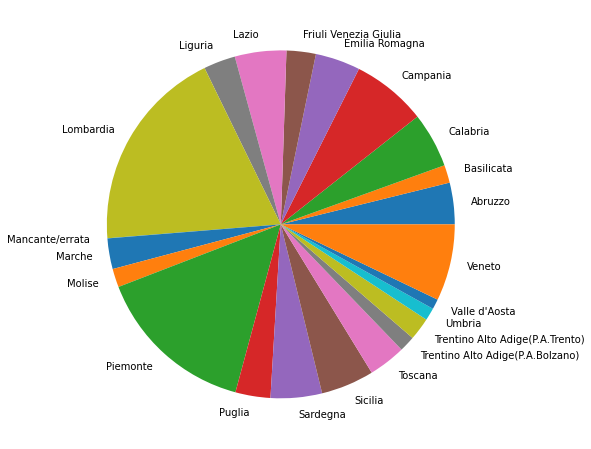

In [11]:
fig = plt.figure(figsize=[8,8])
ax = plt.axes()

ax.pie(dati_reg["Reddito da lavoro dipendente e assimilati - Ammontare in euro"],labels = dati_reg["Regione"]) #grafico a torta

# **N2. l'ammontare del reddito da lavoro dipendente per ogni provincia e relativo grafico a barre verticali**

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

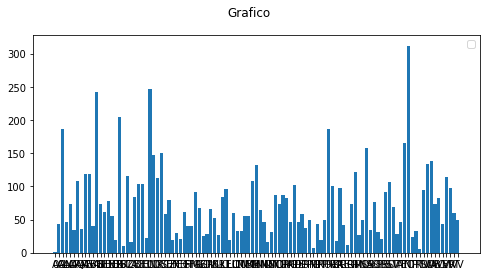

In [12]:
dati_prov = redditi.groupby("Sigla Provincia",as_index = False)["Reddito da lavoro dipendente e assimilati - Ammontare in euro"].count()


fig = plt.figure(figsize=(8,4))
ax = plt.axes()
ax.bar(dati_prov['Sigla Provincia'],dati_prov['Reddito da lavoro dipendente e assimilati - Ammontare in euro'])
ax.legend()
plt.suptitle("Grafico")
plt.show










# Media per ogni regione(solo colonna L)


In [90]:
reg_total = redditi.groupby(['Regione','Sigla Provincia'],as_index = False)['Reddito da lavoro dipendente e assimilati - Ammontare in euro'].sum()

cash_mean = redditi.groupby('Sigla Provincia',as_index = False)['Reddito da lavoro dipendente e assimilati - Ammontare in euro'].mean()
cash_mean
df_mean = pd.merge(reg_total,cash_mean,how='inner',on='Sigla Provincia' )
df_mean
reg_inp = input()

df_mean[df_mean['Regione']==reg_inp].drop(columns='Regione')

Lombardia


,Sigla Provincia,Reddito da lavoro dipendente e assimilati - Ammontare in euro_x,Reddito da lavoro dipendente e assimilati - Ammontare in euro_y
37,BG,10386917812,4.274452e+07
38,BS,11197648824,5.462268e+07
39,CO,5013430649,3.387453e+07
40,CR,3230356097,2.858722e+07
41,LC,3283959863,3.909476e+07
42,LO,2246580820,3.744301e+07
43,MB,9189826579,1.670878e+08
44,MI,38517549666,2.896056e+08
45,MN,3549323511,5.545818e+07
46,PV,4791117678,2.575870e+07


#**N7. dato il nome di una provincia, inserito dall'utente, avere l'elenco dei comuni della provincia con il reddito. Ordinare in ordine crescente sul reddito.**

In [92]:
prov_com = geopandas.sjoin(comuni,provincie,op='within', how='left')
prov_com.sort_values(by='DEN_UTS')

com_red = pd.merge(df_mean,prov_com,how="inner",left_on ='Sigla Provincia',right_on="SIGLA")

prov_inp = input()

com_red[com_red['Sigla Provincia']==prov_inp]
com_red[['Regione','Sigla Provincia','DEN_UTS','Reddito da lavoro dipendente e assimilati - Ammontare in euro_x','Reddito da lavoro dipendente e assimilati - Ammontare in euro_y']].rename(columns={"Reddito da lavoro dipendente e assimilati - Ammontare in euro_x": "Reddito da lavoro dipendente e assimilati - Ammontare in euro_TOTALE", "Reddito da lavoro dipendente e assimilati - Ammontare in euro_y": "Reddito da lavoro dipendente e assimilati - Ammontare in euro_MEDIA"})

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


AQ


,Regione,Sigla Provincia,DEN_UTS,Reddito da lavoro dipendente e assimilati - Ammontare in euro_TOTALE,Reddito da lavoro dipendente e assimilati - Ammontare in euro_MEDIA
0,Abruzzo,AQ,L'Aquila,2010643231,1.861707e+07
1,Abruzzo,AQ,L'Aquila,2010643231,1.861707e+07
2,Abruzzo,AQ,L'Aquila,2010643231,1.861707e+07
3,Abruzzo,AQ,L'Aquila,2010643231,1.861707e+07
4,Abruzzo,AQ,L'Aquila,2010643231,1.861707e+07
...,...,...,...,...,...
7806,Veneto,VR,Verona,8417770760,8.589562e+07
7807,Veneto,VR,Verona,8417770760,8.589562e+07
7808,Veneto,VR,Verona,8417770760,8.589562e+07
7809,Veneto,VR,Verona,8417770760,8.589562e+07
